# Matching with Machine Learning

### An Introduction to Propensity Score Matching 

Experiments are the gold standard for testing hypotheses. They are uniquely able to control *external variance*, allowing researchers to attribute experimental outcomes only to the variance they *choose* to introduce. In scientist lingo, this is referred to as the **treatment effect**. For example, say we want to test the hypothesis "an apple a day keeps the doctor away". In our experiment, we would monitor people who ate one apple, per day, and evaluate their number of doctor visits as compared to another group who ate no apples. In this scenario, the group of people receiving a daily dose of apples is considered the *treatment group* - they are *treated* by eating apples. The other group is considered the *control group* - they receive no apples. To evaluate the effect of eating apples, we could then simply take the difference in doctor visits between our treatment and control groups.

Now, say it just so happens that our control group keeps a phenomenal diet, albeit without apples. At the same time our treatment group eats every apple in an apple pie, which is the healthiest thing they eat all day. It is likely, then, that the control group visits the doctor less often. But, this does not mean we have violated our hypothesis. Rather, we have violated basic assumptions about our treatment and control groups. In experiments, we assume that treatment and control groups are *similar*, that they are just as likely to eat apples as not. Therefore, what we really need to do is compare like-people to like-people. Instead of just monitoring our treatment and control groups, we must also control the variance between both groups. Specifically, we need the include the same kind of people, people who are just as likely to workout, have the same diet, have the same pre-existing conditions, etc., in both treatment and control groups, to judge the effect of an apple on the number of doctor visits.

Experiments, then, are useful because they do just this. They measure directly how an outcome (number of doctor visits) changes given the treatment effect (eating apples) by mitigating any potential bias caused by other factors. The bias causing issues in the apple example is considered a *selection bias*. Specifically, we introduced bias to our research when we *selected* unhealthy people to be observed in the treatment group and healthy people to be observed in the control group. 

However, only a quick look at the blog post "10 Most Famous Psychological Experiments That Could Never Happen Today (http://mentalfloss.com/article/52787/10-famous-psychological-experiments-could-never-happen-today)" shows that sometimes, experiments are just not feasible (or ethical...). Instead, social scientists often rely on observational data, or data that is simply observed in the world, and mathematically generate "pseudo-experimental" settings. In this case, researchers find populations that vary in only one way, say the number of apples they eat every day, but   are otherwise identical. One could imagine that in the same town, people are generally similar. They have the same demographics, are the same age, have the same jobs, etc. However, one day an apple farmer *randomly* sets up an apple shop on the town boarder. People who live on the boarder, who are closer the store, will presumably start to eat more apples as compared to those who have to drive across town. Everything else the same, this group of apple eaters is *randomly* assigned the treatment of eating apples, which effectively mitigates bias in a *quasi-experimental* way. Economists Card and Krueger (1992) published a famous paper using this method, where they measure the effect of minimum wage changes across the Pennsylvania/New Jersey state boarder. By first demonstrating that individuals on either side of the boarder were basically the same - except for the "treatment" of minimum wage being higher in New Jersey - they showed that raising minimum wage had no statistical effect on altering unemployment.

Another way to mitigate selection bias is Propensity Score Matching (PSM), introduced by statisticians Paul Rosenbaum and Donald Rubin in 1983. While I will not detail their proof here, they essentially show that by predicting the *propensity* for an observation to come from a treatment group, and then matching treatment and control observations on their propensities, one can mitigate selection bias. This would be equivalent to throwing all the demographic information of our apple eaters into a model, and then predicting, for each person, how likely they are to eat apples.  By then matching observations, i.e. people who eat apples to those who do not, on their propensity to eat apples, you reduce the external variation leading to selection bias. In our previous example, if we are correct in assuming people in treatment and control groups are similar, then both sets of town members should have equivalent propensity scores.

One way to do this is *logit regression*. The prescribed method is broken down into four parts:

(1) Build a logit model based on the variables you think are most likely to influence the likelihood an observation receives a treatment

(2) Regress the model on "1" if the observation received a treatment and "0" if otherwise, deriving coefficients in the process

(3) Using the coefficients from the model, run the regression on your observations and generate a propensity of treatment for each observation

(4) Match treatment and control observations that have near-equivalent propensities

PSM is particularly useful because it reduces our covariate set (variables of interest - such as apple eating demographics) to a single, scalar propensity score, which is as Rosenbaum & Rubin wrote, is the “conditional probability of assignment to a particular treatment.” Using this method, we can generate near-random assignment of a treatment, generating *pseudo-experimental* settings.

However, from Rosenbaum and Rubin (1983) to Imbens and Woolridge (2009), little discussion is made on what to do with big-data. Simply put, anyone who has a data set with many observations and covariates cannot tractably build a logit model. The problem is, we would like to include as many covariates in our model as are useful to describing how likely an observation (apple eater) is to receive a treatment (eat apples). Computationally, logit regressions are normally solved with numerical optimization which have a run-time complexity of $O(ND^{2})$, meaning that for a data set with millions of observations (N) and thousands of factors (D) - all of which need coefficients - traditional numerical methods of solving a logit regression are intractable.

### Machine Learning to the Rescue

Fortunately, Machine Learning provides us with a tool to find the coefficients of our logit regression. Machine Learning is particularly useful because most machine learning tools use *Stochastic Gradient Descent (SGD)* to find the coefficients, instead of the numerical methods. While I will not go into what SGD is (references provided below), it is important to know that SGD drastically reduces the computational complexity of PSM from $O(ND^{2})$ to $O(N)$. If we have one million observations, one thousand covariates (which is on the smaller side of big data), and each computation for our regression takes 1 micro second, SGD reduces computational time from over a thousand days to around one second.

This tutorial walks you through how I applied Machine Learning in a recent paper to build a logit model, matched observations on that model, and built a pseudo-experimental data set. As far as I know, this is the first time that such a combination of methods has been used in practice. The methods themselves, SGD and PSM, are well proven and used extensively in research, so this tutorial will not delve into those details. Rather, it is a tutorial on how to use such methods on a *big-data* data set to generate matched pairs in near-real time. I advise the reader to reference the papers at the end the tutorial for documents on PSM and ML.

### Tutorial

There are a few facts about this data set you should know before we get started:

- This data is derived from a working paper on how a "public funding" treatment effects the outcomes of patented technologies

- The observations in the data set are individual patents

- The treatment is denoted by "public funding", which is given a "1" if a patent has received public (government) funds and "0" if not

- For more info on variable selection, please see the paper!

### Import Libraries:

- numpy: http://www.numpy.org/
- pandas: http://pandas.pydata.org/
- matplotlib: https://matplotlib.org/devdocs/index.html
- vowpalwabbit: https://pypi.python.org/pypi/vowpalwabbit
- pylab: https://scipy.github.io/old-wiki/pages/PyLab
- seaborn: https://seaborn.pydata.org/
- scipy: https://www.scipy.org/
- sklearn: http://scikit-learn.org/stable/
- time: https://docs.python.org/2/library/time.html

In [1]:
import pandas as pd
import numpy as np
from numbers import Number
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import scipy

sns.set(color_codes = True)

import time
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

### Import Data

To run PSM properly, we must construct our model based upon the items we think will influence the probability of a certain patented technology to receive public funding. From our research, we have chosen the following variables: patent examiner, patent application year, location, technology classification and sub-classification, inventor count & originality.

In [2]:
data_file = '../CME Exercises/patentMatching.csv'
df = pd.read_csv(data_file)
df['patentID'] = df['patentID'].astype('str')
df.head()

/Applications/anaconda/envs/my_vw_ve/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,patentID,publicFunding,examinerName,appYear,state,country,nberCat,nberSubCat,inventorCount,originality
0,3930271,0,Geo. V._Larkin,1974.0,NaN,NaN,NaN,NaN,NaN,0.750000
1,3930272,0,Roy D._Frazier,1974.0,NaN,NaN,6.0,65.0,NaN,0.000000
2,3930273,0,Paul R._Gilliam,1975.0,MO,US,6.0,65.0,1.0,0.292872
3,3930276,0,Edward L._Roberts,1972.0,WI,US,6.0,69.0,1.0,0.437500
4,3930277,0,Edward L._Roberts,1974.0,MN,US,6.0,69.0,1.0,0.555556


Our **public funding** variable is our treatment variable. The rest are controls.

### Pre-Match Distributions

To get a sense of the difference between our treatment group (received public funding) and the control (did not receive public funding), it is useful to show some distributional differences. 

First, we separate our data frames into treatment and control groups.

In [3]:
# I first separate by arrays for easier plotting
nberControl_full, nberTreat_full = df.groupby(['publicFunding'])['nberCat']

# I then handle all "NaN" obeservations. I do not remove from the data frame as I need this information for matching
nberTreat = nberTreat_full[1]
nberTreat = nberTreat[~np.isnan(nberTreat)].astype(int)
nberControl = nberControl_full[1]
nberControl = nberControl[~np.isnan(nberControl)].astype(int)

# I repeat for the "sub" technology levels
nberSubControl, nberSubTreat = df.groupby(['publicFunding'])['nberSubCat']
nberSubTreat = nberSubTreat[1]
nberSubTreat = nberSubTreat[~np.isnan(nberSubTreat)].astype(int)
nberSubControl = nberSubControl[1]
nberSubControl = nberSubControl[~np.isnan(nberSubControl)].astype(int)

#Sample size differences between treatmetn and control
print('Treatment Observations {}'.format(len(nberTreat_full[1])))
print('Control Observations {}'.format(len(nberControl_full[1])))

Treatment Observations 72423
Control Observations 3354327


It is clear that there is a mismatch in sample size between treatment and control, which, according to Rosenbaum and Rubin (1983) could bias to our results. We should therefore investigate the distributions in our covariates to see if our treatment and control groups come from the similar *populations* of patents.

#### Technology Class Differences

Next, we plot the difference in technology class and subclass.

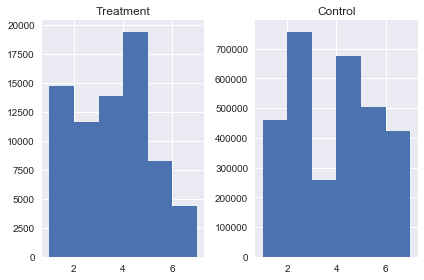

In [4]:
plt.subplot(1,2,1)
plt.title('NBER Technology Classification')
#fig, ax = plt.subplots()
plt.hist(nberTreat,  bins=range(min(nberTreat), max(nberTreat) + 1, 1))
plt.title('Treatment')

plt.subplot(1,2,2)
#fig2, ax2 = plt.subplots()
plt.hist(nberControl, bins=range(min(nberControl), max(nberControl) + 1, 1))
plt.title( 'Control')

plt.tight_layout()

These distributions show a large difference in technology classification between treatment and control. Note, we are comparing the distributions, not the absolute values, of these histograms. It is therefore important to analyze the shapes and not the count values on the Y axis.

#### Technology SubClass Differences

The difference in technology distributions is further highlighted by analyzing treatment and control groups at the sub classification level.

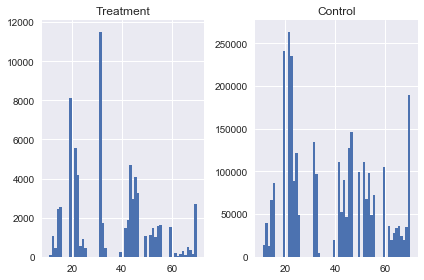

In [5]:
plt.title('NBER Technology Sub Classification')

plt.subplot(1,2,1)
plt.hist(nberSubTreat,  bins=range(min(nberSubTreat), max(nberSubTreat) + 1, 1))
plt.title('Treatment')

plt.subplot(1,2,2)
plt.hist(nberSubControl,  bins=range(min(nberSubControl), max(nberSubControl) + 1, 1))
plt.title( 'Control')

plt.tight_layout()

There are 6 major patent technology classes and 36 subclasses (http://www.nber.org/patents/). We can see from these two histogram comparisons (treatment on the left, control on the right) that the technologies which receive public funding are generally different from those that do not. This suggests that if we do not match our observations, our outcomes will be biased.

#### Inventor Count

Next, we plot the histograms of inventor counts

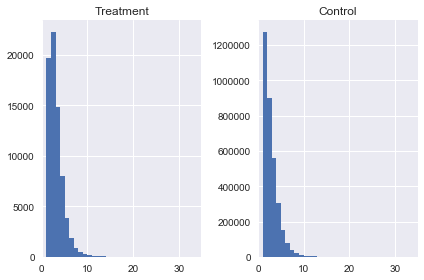

In [6]:
inventorCount_control_full, inventorCount_treat_full = df.groupby(['publicFunding'])['inventorCount']

# I then handle all "NaN" obeservations. I do not remove from the data frame as I need this information for matching
inventorCount_treat = inventorCount_treat_full[1]
inventorCount_treat = inventorCount_treat[~np.isnan(inventorCount_treat)].astype(int)
inventorCount_control = inventorCount_control_full[1]
inventorCount_control = inventorCount_control[~np.isnan(inventorCount_control)].astype(int)

ax = plt.subplot(1,2,1)
ax.set_xlim(0,35)
plt.hist(inventorCount_treat, bins=range(min(inventorCount_treat), max(inventorCount_treat) + 1, 1))
plt.title('Treatment')

ax2 = plt.subplot(1,2,2)
ax2.set_xlim(0,35)
plt.hist(inventorCount_control, bins=range(min(inventorCount_control), max(inventorCount_control) + 1, 1))
plt.title( 'Control')

plt.tight_layout()

Interestingly, here we see a fairly even distribution in the number of inventors per patent (averages below). It is important then to maintain the inventor count similarity through our matching process.

In [7]:
print('Average Inventor Count, Treatment {}'.format(np.mean(inventorCount_treat)))
print('Average Inventor Count, Control {}'.format(np.mean(inventorCount_control)))

Average Inventor Count, Treatment 2.5789531832619805
Average Inventor Count, Control 2.367521512782439


#### Originality

I next plot the differences in originality, which is a quantitative measure of how different a patented technology is from those that came before it. Since originality distributions are typically weighted at 1 and 0, we remove those for graphical purposes. Here, we can see (as expected) that those patents which were publically funded have a heavier weight placed on the distribution closer to 1, while those patents which were not publically funded have heavier weights in the middle of the distribution

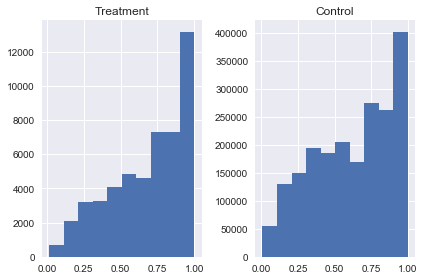

In [8]:
originality_control_full, originality_treat_full = df.groupby(['publicFunding'])['originality']


originality_treat = originality_treat_full[1]
originality_treat = originality_treat[~np.isnan(originality_treat)]
originality_control = originality_control_full[1]
originality_control = originality_control[~np.isnan(originality_control)]

originality_treat = originality_treat[originality_treat[:] > 0]
originality_treat = originality_treat[originality_treat[:] < 1]
originality_control = originality_control[originality_control[:] > 0]
originality_control = originality_control[originality_control[:] < 1]

ax = plt.subplot(1,2,1)
plt.hist(originality_treat)
plt.title('Treatment')

ax2 = plt.subplot(1,2,2)
plt.hist(originality_control)
plt.title('Control')
plt.tight_layout()

#### Patent Location

Next, I plot a count of patents by states. In this grouping, all non US patents are removed from the data set, as well as all observations missing a location. Again, we see a significant difference in the distribution of treatment and control groups.

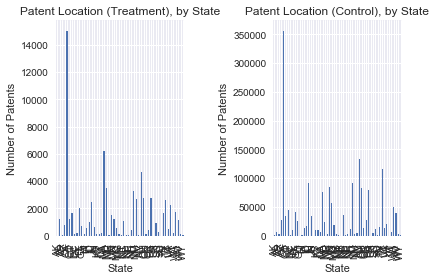

In [9]:
state_control_full, state_treat_full = df.groupby(['publicFunding'])['state']

treat_values = {'state': state_treat_full[1].astype(str), 'constant': np.ones(len(state_treat_full[1]))}
state_treat = pd.DataFrame(data=treat_values)
state_treat = state_treat.drop(state_treat.index[state_treat['state'] == 'nan'])

state_treat_groups = state_treat.groupby('state')
sums_treat = state_treat_groups.aggregate(np.sum)

control_values = {'state': state_control_full[1], 'constant': np.ones(len(state_control_full[1]))}
state_control = pd.DataFrame(data=control_values)
state_control = state_control.drop(state_control.index[state_control['state'] == 'nan'])

state_control_groups = state_control.groupby("state")
sums_control = state_control_groups.aggregate(np.sum)

plt.subplot(1,2,1)
_ = sums_treat['constant'].plot(kind='bar')
_ = plt.title('Patent Location (Treatment), by State')
_ = plt.xlabel('State')
_ = plt.ylabel('Number of Patents')

plt.subplot(1,2,2)
_ = sums_control['constant'].plot(kind='bar')
_ = plt.title('Patent Location (Control), by State')
_ = plt.xlabel('State')
_ = plt.ylabel('Number of Patents')

plt.tight_layout()

A closer look at the patent distribution, by state:

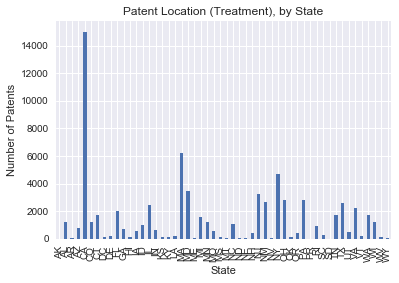

In [10]:
_ = sums_treat['constant'].plot(kind='bar')
_ = plt.title('Patent Location (Treatment), by State')
_ = plt.xlabel('State')
_ = plt.ylabel('Number of Patents')

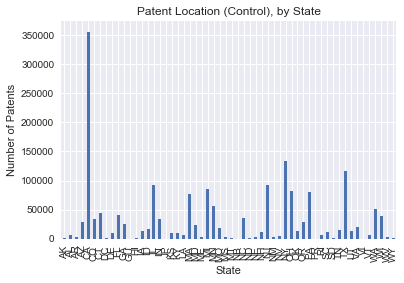

In [11]:
_ = sums_control['constant'].plot(kind='bar')
_ = plt.title('Patent Location (Control), by State')
_ = plt.xlabel('State')
_ = plt.ylabel('Number of Patents')

These graphs are great visual tools to help us evaluate the population differences between treatment and control groups. For example, in our control group, there is nearly an equivalent number of technologies patented in Massachusetts and Michigan (~90,000 each). However, in our treatment group, Massachusetts (> 6,000) has over three times as many patents as Michigan (< 2,000).

This difference is important - it not only provides us the motivation for our matching, but also provides us a useful test case from which to analyze our results against. Next, we turn to building our logit model using ML.

### Vowpal Wabbit:

There are a significant number of great ML tools that are free of use. I personally like Vowpal Wabbit. Vowpal Wabbit is fast, online learning code sponsored by Microsoft Research Group and (previously) Yahoo! Research. It was started and is led by John Langford. For more information, visit https://github.com/JohnLangford/vowpal_wabbit/wiki.

VW is great for analyzing this data set as it flexible enough to handle both factor variables (such as examiner names) and absent observations (as you see with all of our NaNs). Other tools require a bit of pre-processing to get around such issues. Furthermore, it relies on an unique SGD (sparse gradient descent) to build a logit model - which is a way of saying that it's optimization tool is uniquely situated to handle large data sets such as ours. 


One issue is that Vowpal Wabbit is not the easiest package to port into python. While I typically use it from the terminal (mac), I've taken some lengths to get it to work with Anaconda/Ipython Notebook. For a good discussion on how to install Vowpal Wabbit please see https://github.com/JohnLangford/vowpal_wabbit/issues/1095.

#### Convert Data Set in to VW data set

The first step is to convert our data set into a VW data set. For that, I created the "build_VW_dataset" function below. I used a number of concepts from Hai Ning's VW Format post (https://gallery.cortanaintelligence.com/Experiment/Step-1-Convert-Dataset-to-VW-Format-1), adding and altering as needed. Please feel free to use/adapt/etc. to your own needs!

In [12]:
def build_VW_dataset(df, treatmentLabel, observation_id, covariates):
    
    def clean(c): #This removes the VW specific text from a column. VW uses | and : as special identifiers
        return "".join(c.split()).replace("|", "").replace(":","")
    
    def buildRow(row):
        string_list = []
        #We start with by adding the treatmentLabel values (0 or 1) to our lines as "-1" and "1"
        string_list.append("{} ".format('1' if row[treatmentLabel] == 1 else '-1'))
        #We then add the id variable with a "'" identifier
        string_list.append("'{} ".format(row[observation_id]))
        
        for variable in covariates:
            if (row[variable] == 'NaN'): #We want to skip NaN variables
                pass
            elif (isinstance(row[variable],Number)): #We want to add continuos variables with the ":"
                string_list.append("|{}:{} ".format(variable, row[variable]))
            else: #We want to add factor variables with a " "
                string_list.append("|{} {} ".format(variable, clean(str(row[variable]))))
                            
        vw_line = "".join(string_list)
        return vw_line 
    
    return df.apply(buildRow, axis = 1).to_frame()

Simply put, the above function follows VW's style guide (https://github.com/JohnLangford/vowpal_wabbit/wiki/Input-format), pulling variables line by line from the data set and concatenating them into well formatted strings. While this is a custom function to building our data set, the general principles (for a logit regression) are:

- Start each line with at "-1" or "1" to denote control and treatment, respectively
- If applicable, follow with a "'" and a unique id number (such as patent numbers)
- Start each new category with a | followed by the variable category name
- If the variable is a factor variable, follow the variable name with a " " and the variable itself
- If the variable is a continuous variable, follow the variable name with a ":" and the variable itself

Next step is to build a file from our data set:

In [13]:
df2 = df[0:1000]
covariates = list(df2)
start = time.time()
vw_text_file = build_VW_dataset(df2, covariates.pop(1), covariates.pop(0), covariates)
end = time.time()

print("Creating a VW file of {} observations took {}".format(len(df2),end-start))

df3 = df[0:100000]
covariates = list(df3)
start = time.time()
vw_text_file = build_VW_dataset(df3, covariates.pop(1), covariates.pop(0), covariates)
end = time.time()

print("Creating a VW file of {} observations took {}".format(len(df3),end-start))

print(vw_text_file[0:10])

Creating a VW file of 1000 observations took 0.2448270320892334
Creating a VW file of 100000 observations took 21.9708731174469
                                                   0
0  -1 '3930271 |examinerName Geo.V._Larkin |appYe...
1  -1 '3930272 |examinerName RoyD._Frazier |appYe...
2  -1 '3930273 |examinerName PaulR._Gilliam |appY...
3  -1 '3930276 |examinerName EdwardL._Roberts |ap...
4  -1 '3930277 |examinerName EdwardL._Roberts |ap...
5  -1 '3930280 |examinerName HarryN._Haroian |app...
6  -1 '3930281 |examinerName Daniel_Blum |appYear...
7  -1 '3930282 |examinerName LouisG._Mancene |app...
8  -1 '3930283 |examinerName AntonO._Oechsle |app...
9  -1 '3930284 |examinerName Robert_Peshock |appY...


As you can see, this way of generating VW files takes significantly long. As we have nearly 3.5M observations, we will not run the full file here (which will take ~10 minutes). Fortunately, we have an "already cooked" version that is loaded below. I changed the variable ordering so you can see how continuous variables look in VW format.

*There is more likely a more efficient way to reformat whole columns and merge within a data frame. This would probably allow us to do a full file merge in near real time (for a future version).*

In [14]:
vw_data_file = '../CME Exercises/file_for_match.tsv'
vw_df = pd.read_table(vw_data_file,header = None)
print(vw_df[0:10])

                                                   0
0  -1.0 '3930271 |appYear:1974 |examinerName Geo....
1  -1.0 '3930272 |appYear:1974 |nberCat:6 |nberSu...
2  -1.0 '3930273 |appYear:1975 |nberCat:6 |nberSu...
3  -1.0 '3930276 |appYear:1972 |nberCat:6 |nberSu...
4  -1.0 '3930277 |appYear:1974 |nberCat:6 |nberSu...
5  -1.0 '3930280 |appYear:1974 |nberCat:6 |nberSu...
6  -1.0 '3930281 |appYear:1974 |nberCat:6 |nberSu...
7  -1.0 '3930282 |appYear:1974 |nberCat:6 |nberSu...
8  -1.0 '3930283 |appYear:1974 |nberCat:6 |nberSu...
9  -1.0 '3930284 |appYear:1972 |nberCat:6 |nberSu...


##### Train Logit Model

Next, we want to train our logit model. In machine learning, we normally split our data into training and test data sets (since our logit model is already chosen, we do not need to worry about model validation). This provides researchers with a small set of data from which to test their model's predictive performance. However, in economics, PSM is used to ensure *randomness in treatment*. The more random a treatment is, then, the less accurate our logit model will be in predicting if an observation comes from a treatment group. So, the combination of both training and testing make little sense here. 

This is endemic of the difference between model selection and model creation. In ML, researchers *select* the appropriate model by testing many models and determining which one has the best predictive performance. In PSM, it is up the researcher to *create* a model by choosing the important covariates of interest. By providing evidence that these covariates are important to treatment, and then showing equal distribution in covariates across treatment and control groups, PSM ensures random assignment. Because perfect random assignment has no predictive power, we no longer need to have a *test* group from which to assess our logit model. 

*Note that PSM ensures a measurement of ATT, or the Average effect of Treatment on the Treated. Essentially, this means that whatever we get back from our results only applies to those observations that are matched, and not to those patents which are in the non-matched population.*

In the next steps, we'll run Vowpal Wabbit from the terminal. After model is created and run, the propensity score results are ported back in to Jupyter. Vowapl Wabbit does have a python wrapper (vwpy) that could be used in line with a Jupyter notebook. However, it is a bit temperamental to install on Mac. Specifically, there are serious issues installing it in a conda environment (https://github.com/JohnLangford/vowpal_wabbit/issues/1267). It is straight forward to run on a terminal, so that is what I will walk through here. If you would like to give it the 'ole college try and attempt to load Vowpal Wabbit into your python environment, the link below will direct you to the relevant resources.

- https://github.com/JohnLangford/vowpal_wabbit

To generate the coefficients for our model, we run Vowpal Wabbit with one line of code that looks like this:

![To generate the coefficients for our model, we run vowpal wabbit with one line of code that looks like this:](../CME Exercises/vowpal_wabbit_pic1.png "Vowpal Wabbit Logit Regression Code, Pre Run")

I recommend you visit the Vowpal Wabbit site (linked above) to understand exactly what this code does, but a quick overview:

- c: Use a cache, makes computations faster
- l: Sets the learning rate
- passes: Number of passes to the data
- loss_function: Sets the type of model to run (logistic = logit)
- d: file to build the model from (this is equivalent to our data frame above)
- f: file to save the model to

After running the above code, you will get a file that looks like this:

![Post computation:](../CME Exercises/vowpal_wabbit_pic2.png "Vowpal Wabbit Logit Regression Code, Post Run")

This output contains factors relating to the optimization (such as the decay rate) and to the results of the logit regression (such as the weighted sums). From this model, we generated the Vowpal Wabbit file **predictor.vw**, which is the model we will use to generate the propensity scores of our observations.

##### Run Logit Model on All Observations

Next step is to use **predictor.vw** to generate predictions. The file ouput looks like this:

![Post predictions:](../CME Exercises/vowpal_wabbit_pic3.png "Vowpal Wabbit Logit Regression Code, Post Predictions")

Quick definitions of the above commands:

- i: The model from which to generate predictions
- t: The file to predict
- p: The file to send the predicted outputs

And we have our predicted values! Since we assigned patent ids as unique ids in the formatting step, our output file will be in the form of two columns, (1) logit propensity score and (2) patent id. 

### Propensity Score Matching

The following steps use the results from our predictions.

#### Pre-Match Distributions

After we have our predictions, the next step is to match. First, we import our prediction resutls:

In [15]:
predictions = '../CME Exercises/predictions.txt'
pScore_df = pd.read_table(predictions, delim_whitespace = True, names=['pScoreWeight','patentID'])
pScore_df['patentID'] = pScore_df['patentID'].astype('str')

pScore_df[0:10]

/Applications/anaconda/envs/my_vw_ve/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pScoreWeight,patentID
0,-4.857188,3930271
1,-5.220756,3930272
2,-5.259171,3930273
3,-4.110098,3930276
4,-4.721642,3930277
5,-3.771526,3930280
6,-7.485131,3930281
7,-5.499960,3930282
8,-8.832291,3930283
9,-5.979056,3930284


Next, we add the column **public funding** to separate treatment and control groups for matching.

In [16]:
df_forMatch = df[['patentID','publicFunding']]
pScore_df = pd.merge(pScore_df, df_forMatch, on = 'patentID', how = 'left')
print(pScore_df[0:10])

   pScoreWeight patentID  publicFunding
0     -4.857188  3930271              0
1     -5.220756  3930272              0
2     -5.259171  3930273              0
3     -4.110098  3930276              0
4     -4.721642  3930277              0
5     -3.771526  3930280              0
6     -7.485131  3930281              0
7     -5.499960  3930282              0
8     -8.832291  3930283              0
9     -5.979056  3930284              0


Next, we plot overlapping support, pre-match. This displays the density of propensity score of both our "treatment" and "control" groups.

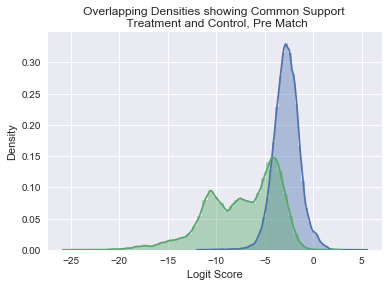

In [17]:
pScore_Control, pScore_Treat = pScore_df.groupby(['publicFunding'])
pScore_Control = pScore_Control[1]
pScore_Treat = pScore_Treat[1]
g = sns.distplot(pScore_Treat['pScoreWeight'])
_ = sns.distplot(pScore_Control['pScoreWeight']) 
_ = g.set_title('Overlapping Densities showing Common Support \n Treatment and Control, Pre Match')
_ = g.set(xlabel='Logit Score', ylabel='Density')

This figure displays the *common support* between treatment (blue) and control (green) groups. Specifically, it displays the differences in the *probability of receiving public funding*, as a scalar, across all covariates. The figure supports the notion that there is a limited area (shaded blue and green) over which there exists some common support. However, it is important to note the difference in sample size. Since our control group has ~3.3M observations, but our treatment groups has only ~70K observations, even within the tails of the control distribution there are a significant number of observations from which to select matched pairs.

### Matching on Propensity Scores

Matching treatment and control observations is a relatively simple process. Essentially, the objective is to minimize some distance (we use *Manhattan*, which is the absolute value of the difference in propensity score) locally between two observations, and to minimize the global distance between all observations. Unfortunately, as of writing this, I am unaware of any native n x n matching algorithms in Python. MatchIt (https://cran.r-project.org/web/packages/MatchIt/MatchIt.pdf) is an extremely useful matching package, but it is only available in R. MatchIt offers a number of different ways to minimize both local and global distances, but all require extensive computation time (~8 hours for this data set). 

While MatchIt will not work for this tutorial, it does provide some useful strategies for finding the closest distances between two observations. MatchIt relies on a greedy algorithm (greedy as in computationally greedy) for one-to-one matching. First, the distance between each treatment and all control observations is calculated. Then, a series of matrix operations are performed to find optimal pairs (row/column combinations). The optimization minimizes the distance between a single treatment and a single control observation, given the minimum distances of all other treatment-control pairs. Within this method, matches are performed *without* replacement (unique row/column combinations). This ensures that all treatments are matched to a different control, ensuring equivalent sample sizes.

Machine Learning provides another option. *Nearest Neighbors* (kNN) regression generates matches in a similar way, yet does it by locally confining the search to the set of closest neighbors. Unlike the greedy algorithm, this method will match our data set near-instantaneously. However, kNN algorithms only perform matching *with* replacement, as they search over a landscape of locally confined distances. By removing matches after match, the landscape changes - which would invalidate the landscape. Unfortunately, this means the kNN can only get us part of the way.

As our objective is to perform this one to one matching, without replacement, in reasonably quick time, I propose a hybrid approach. Essentially, we perform iterative kNN matching until our treatment set is reduced to a reasonably small sample, and then convert to a greedy algorithm for the remaining observations. This exponentially increases the speed of matching. While optimal adjustments could (and should) be made, this method works well enough to show case the power of PSM to match treatment and control groups.

First, we separate treatment and control groups, careful to take care of the indices.

In [18]:
print("Number of control obesrvations {}".format(len(pScore_Control['pScoreWeight'])))
print("Number of treatment obesrvations {}".format(len(pScore_Treat['pScoreWeight'])))

Number of control obesrvations 3354327
Number of treatment obesrvations 72423


Second, we simply discard all control observations that are below our supported range. These can be discarded because we know that they will not be matched with a treatment observation.

In [19]:
pScore_Control = pScore_Control[pScore_Control['pScoreWeight'] > min(pScore_Treat['pScoreWeight'])]
print("Updated number of control obesrvations {}".format(len(pScore_Control['pScoreWeight'])))

Updated number of control obesrvations 2960309


As you can see, we got rid of ~394K observations, which will help to reduce the time to calculate matched pairs.

To further reduce the sample size, we randomly remove 95 percent of the control observations with a propensity score of less than -5. This is valid for our data set given the order of magnitude difference between treatment and control. As seen below, even after removing 95% of observations with a propensity score less than -5, we still have a sizeable control set over which to match.

In [20]:
pScoreC_withRange = pScore_Control[pScore_Control['pScoreWeight'] < -5]
pScoreC_withRange = pScoreC_withRange.sample(frac=0.05)
pScore_Control = pd.concat([pScore_Control[pScore_Control['pScoreWeight'] >= -5], pScoreC_withRange])
print("Number of control obesrvations after random removal {}".format(len(pScore_Control)))

Number of control obesrvations after random removal 1264655


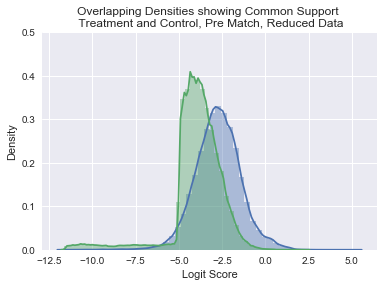

In [21]:
#plot the new density so that we know we are still in the clear (assuming it has the same schape)
g = sns.distplot(pScore_Treat['pScoreWeight'])
sns.distplot(pScore_Control['pScoreWeight'])
_ = g.set_ylim(0,0.5)
_ = g.set_title('Overlapping Densities showing Common Support \n Treatment and Control, Pre Match, Reduced Data')
_ = g.set(xlabel='Logit Score', ylabel='Density')

Our comparison chart looks a bit funky now, but that is because we've only sampled below our cutoff of -5. The key is that we've reduced our control sample dramatically, and we still have many samples for which to match our treatment set.

Next, I have first included a sample of a naive, greedy matching algorithm. While this matching algorithm has no global minimization capability, it does include a tolerance by which matches with distances over that tolerance are discarded from the data set. Even with the relative simplicity of local optimization, this greedy algorithm takes ~200 minutes to run.

In [22]:
def jasons_nieve_nn_matching_algorithm(treatment, control, max_tol, min_tol):
    matched_set = []
    matched_values = []
    matched_distances = []
    treatment = treatment.sort_values(['pScoreWeight']) # first we sort treatment values least to greatest

    treatment_p = treatment['pScoreWeight'].values

    for index, value in enumerate(treatment_p):
        closest_values = abs(control['pScoreWeight'].values - value) #L1 Distance is our loss function
        c_value = min(closest_values) #find the minimum of all L1 distances
        
        if c_value < min_tol: #if the differences are within a tolerance, treat as equal
            matched_distances.append(c_value)
            c_index = np.argmin(closest_values)
            matched_set.append((treatment.iloc[index]['patentID'], control.iloc[c_index]['patentID'])) # calculate matched set
            matched_values.append((treatment.iloc[index]['pScoreWeight'], control.iloc[c_index]['pScoreWeight']))
            
            #keep a set of the ing recreate the array. 
            control = control.drop(control.index[c_index]) # Remove matched observation
        
    return matched_set, matched_values, matched_distances

Below is a snippet of code to run the greedy matching algorithm. You can add some efficiencies to the code above to make this work faster, but I would not recommend running this code unless you have a few hours to spare!

In [23]:
#start = time.time()
#min_tol = 1e-3 #which is no greater than ~.025 percentage points difference between treatment and control
#matched_set, matched_values = jasons_nieve_nn_matching_algorithm(pScore_Treat,pScore_Control,1,min_tol)
#end = time.time()

#### kNN Classifier

Next, I introduce a hybrid approach. First, we use sklearn's NearestNeighbors package to generate nearest neighbors, with replacement. Then, we only save the matched pairs which are unique matches, randomly selecting from those observations which are matched to the same control observation. We do this iteratively until the number of unique matches is reduced to some threshold (here, we put the threshold at 10). Once that threshold is reached, we convert to the greedy matching algorithm above. For reference, matching only using the iterative kNN approach reduces the time to reach a perfectly matched set from 200 to ~37 minutes. By performing a hybrid approach, we return a matched set in under 7!

In [24]:
start = time.time() # While I've broken down this algorithm as a for loop, this could be easily transcribed as a function
matched_values = []
matched_set = []
matched_distances = []
i = 0
n = 100 # This counter is useful to change the number of iterations you run kNN for. 

for i in range(n): ## if you want to run kNN to completion, simply chage this to a while loop
    if len(pScore_Treat) == 0: #This terminates kNN iterations if there is nothing left to interate
        break

    i = i + 1 #This generates an internal counter of kNN iterations 
    treat = pScore_Treat['pScoreWeight'].values #This alters the format of values for the sklearn NN algorithm
    treat = treat.reshape(-1, 1)

    control = pScore_Control['pScoreWeight'].values
    control = control.reshape(-1,1)

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='kd_tree', metric = 'manhattan').fit(control)
    distances, indices = nbrs.kneighbors(treat)
    indices = np.array(indices.reshape(-1))
    
    unique_controls, unique_treatments = np.unique(indices, return_index =True) #This updates our matched sets with results
    matched_values = matched_values + list(zip(pScore_Treat.iloc[unique_treatments]['pScoreWeight'], pScore_Control.iloc[unique_controls]['pScoreWeight']))
    matched_set = matched_set + list(zip(pScore_Treat.iloc[unique_treatments]['patentID'], pScore_Control.iloc[unique_controls]['patentID']))
    matched_distances = matched_distances + list(distances[np.array(unique_treatments)].reshape(-1))
    
    pScore_Control = pScore_Control.drop(pScore_Control.index[unique_controls]) # Remove matched observation
    pScore_Treat = pScore_Treat.drop(pScore_Treat.index[unique_treatments])
    
    if len(np.unique(indices)) <= 10: #If there are less than 10 unique values left, then convert to the greedy algorithm
        matched_set_rest, matched_values_rest, matched_distances_rest = jasons_nieve_nn_matching_algorithm(pScore_Treat,pScore_Control,10000,10000)
        matched_set = matched_set + matched_set_rest
        matched_distances = matched_distances + matched_distances_rest
        break #Break after compleition


end = time.time()

indices = np.array(indices.reshape(-1))

matched_distances = np.array(matched_distances)
print('In {} iterations {} treatment-control pairs were matched'.format(i,len(matched_distances)))
print('Matching took: {} minutes'.format("%.2f" % ((end-start)/60)))
print('Percentage of Treatment Matched with a Tolerance of {}, {} %'.format(.001,("%.2f" % ((len(matched_distances[matched_distances < .001])/len(matched_distances))*100))))

In 57 iterations 72423 treatment-control pairs were matched
Matching took: 6.18 minutes
Percentage of Treatment Matched with a Tolerance of 0.001, 97.96 %


While the astute observer will see that some of our matched observations have very large distances, you could add a distance vector to mitigate (remove) this effect in the final sample. You can see from our matches that 98% of our treatment observations match a control observation within 0.001 logit points.

#### Post Match Distributions

First, we show that the matched pairs have overlapping logit scores to confirm that the matching was successful.

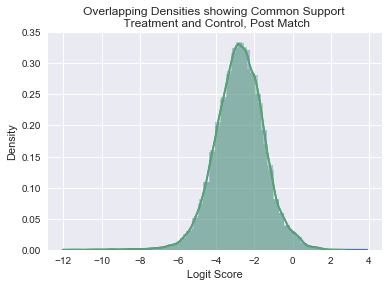

In [25]:
treatment_matched_list, control_matched_list = zip(*matched_values)

g = sns.distplot(treatment_matched_list)
_ = sns.distplot(control_matched_list)
_ = g.set_title('Overlapping Densities showing Common Support \n Treatment and Control, Post Match')
_ = g.set(xlabel='Logit Score', ylabel='Density')

The overlapping density chart shows the propensity score densities of both treatment and control groups, post match. It looks like one graph instead of two because of how well the data sets match!

### Distribution Charts

Next, I re-plot technology class, technology sub class, inventor, originality and location distributions. As you can see, PSM was extremely successful in reducing our covariates to a single scalar, matching on that scalar, and sampling matched distributions across all covariates!

First, we unzip our matched observations and build data frames from the original population data set.

In [34]:
treatment_matched_patentIds, control_matched_patentIds = zip(*matched_set)
t_index = [str(x) for x in treatment_matched_patentIds]
c_index = [str(x) for x in control_matched_patentIds]
df['patentID'] = df['patentID'].astype(str)

pScore_Control_matched = df[df['patentID'].isin(c_index)]
pScore_Treat_matched = df[df['patentID'].isin(t_index)]

#### NBER Technology Class

Next, we plot NBER technology class, sub class, inventor, originality and location distributions.

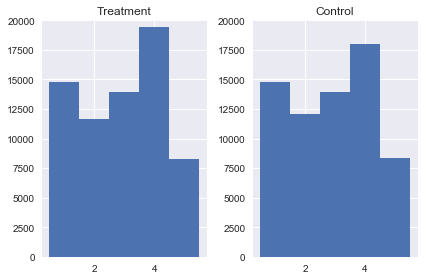

In [27]:
nberTreat = pScore_Treat_matched['nberCat']
nberTreat = nberTreat[~np.isnan(nberTreat)].astype(int)
nberControl = pScore_Control_matched['nberCat']
nberControl = nberControl[~np.isnan(nberControl)].astype(int)

ax = plt.subplot(1,2,1)
ax.set_ylim(0, 20000)
plt.hist(nberTreat, bins= [0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
plt.title('Treatment')

ax2 = plt.subplot(1,2,2)
ax2.set_ylim(0, 20000)
plt.hist(nberControl, bins= [0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
plt.title( 'Control')

plt.tight_layout()

#### NBER Technology Sub Classification

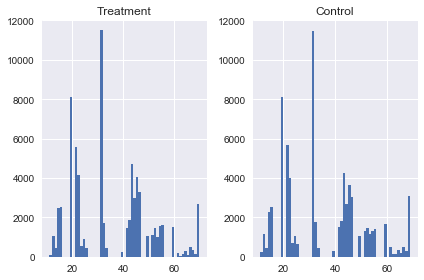

In [28]:
nberSubTreat = pScore_Treat_matched['nberSubCat']
nberSubTreat = nberSubTreat[~np.isnan(nberSubTreat)].astype(int)
nberSubControl = pScore_Control_matched['nberSubCat']
nberSubControl = nberSubControl[~np.isnan(nberSubControl)].astype(int)

ax1 = plt.subplot(1,2,1)
ax1.set_ylim(0, 12000)
plt.hist(nberSubTreat, bins=range(min(nberSubTreat), max(nberSubTreat) + 1, 1))
plt.title('Treatment')

ax2 = plt.subplot(1,2,2)
ax2.set_ylim(0, 12000)
plt.hist(nberSubControl, bins=range(min(nberSubControl), max(nberSubControl) + 1, 1))
plt.title( 'Control')

plt.tight_layout()

#### Inventor Count

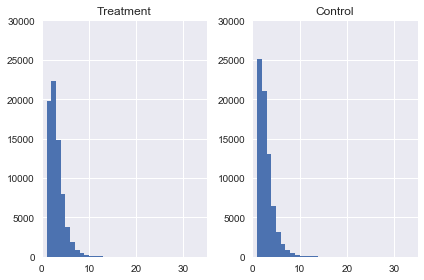

In [29]:
inventorCount_treat = pScore_Treat_matched['inventorCount']
inventorCount_treat = inventorCount_treat[~np.isnan(inventorCount_treat)].astype(int)
inventorCount_control = pScore_Control_matched['inventorCount']
inventorCount_control = inventorCount_control[~np.isnan(inventorCount_control)].astype(int)

ax = plt.subplot(1,2,1)
ax.set_xlim(0, 35)
ax.set_ylim(0, 30000)
plt.hist(inventorCount_treat, bins=range(min(inventorCount_treat), max(inventorCount_treat) + 1, 1))
plt.title('Treatment')

ax2 = plt.subplot(1,2,2)
ax2.set_xlim(0,35)
ax2.set_ylim(0, 30000)
plt.hist(inventorCount_control, bins=range(min(inventorCount_control), max(inventorCount_control) + 1, 1))
plt.title( 'Control')

plt.tight_layout()

#### Originality

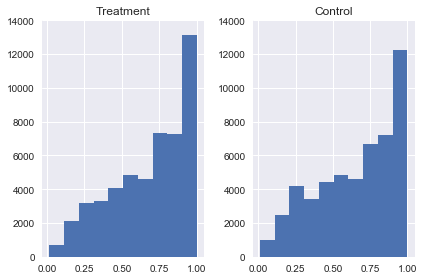

In [30]:
originality_treat = pScore_Treat_matched['originality']
originality_treat = originality_treat[~np.isnan(originality_treat)]
originality_control = pScore_Control_matched['originality']
originality_control = originality_control[~np.isnan(originality_control)]

originality_treat = originality_treat[originality_treat[:] > 0]
originality_treat = originality_treat[originality_treat[:] < 1]
originality_control = originality_control[originality_control[:] > 0]
originality_control = originality_control[originality_control[:] < 1]

ax = plt.subplot(1,2,1)
ax.set_ylim(0, 14000)
plt.hist(originality_treat)
plt.title('Treatment')

ax2 = plt.subplot(1,2,2)
ax2.set_ylim(0, 14000)
plt.hist(originality_control)
plt.title('Control')

plt.tight_layout()

#### Location

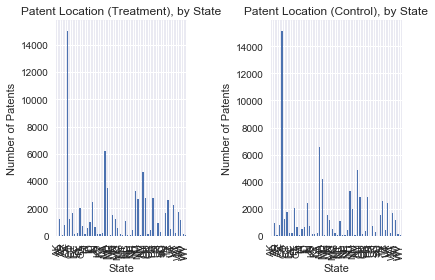

In [31]:
treat_values = {'state': pScore_Treat_matched['state'].astype(str), 'constant': np.ones(len(pScore_Treat_matched['state'].values))}
state_treat = pd.DataFrame(data=treat_values)
state_treat = state_treat.drop(state_treat.index[state_treat['state'] == 'nan'])

state_treat_groups = state_treat.groupby('state')
sums_treat = state_treat_groups.aggregate(np.sum)

control_values = {'state': pScore_Control_matched['state'].astype(str), 'constant': np.ones(len(pScore_Control_matched['state'].values))}
state_control = pd.DataFrame(data=control_values)
state_control = state_control.drop(state_control.index[state_control['state'] == 'nan'])

state_control_groups = state_control.groupby("state")
sums_control = state_control_groups.aggregate(np.sum)

plt.subplot(1,2,1)
_ = sums_treat['constant'].plot(kind='bar')
_ = plt.title('Patent Location (Treatment), by State')
_ = plt.xlabel('State')
_ = plt.ylabel('Number of Patents')

plt.subplot(1,2,2)
_ = sums_control['constant'].plot(kind='bar')
_ = plt.title('Patent Location (Control), by State')
_ = plt.xlabel('State')
_ = plt.ylabel('Number of Patents')

plt.tight_layout()

A closer look at the patent break down, by state

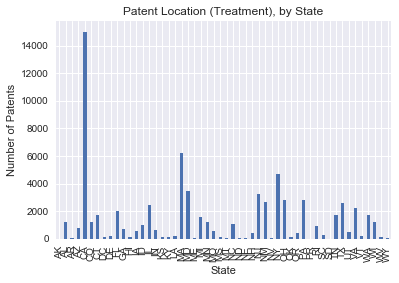

In [32]:
_ = sums_treat['constant'].plot(kind='bar')
_ = plt.title('Patent Location (Treatment), by State')
_ = plt.xlabel('State')
_ = plt.ylabel('Number of Patents')

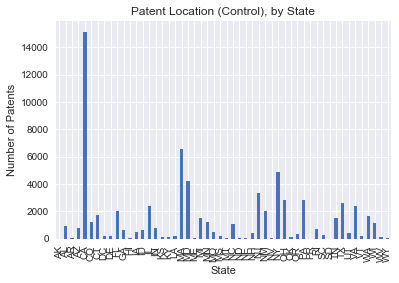

In [33]:
_ = sums_control['constant'].plot(kind='bar')
_ = plt.title('Patent Location (Control), by State')
_ = plt.xlabel('State')
_ = plt.ylabel('Number of Patents')

### Conclusion

As we can see from the graphs, we, post match, have overlapping probability densities. Our sensitivity tests show us that PSM was effective, and that ML can go along way to helping perform PSM on large data sets. At the end of the day, we can only use our best judgement in matching, and the burden of proof is always on the researcher!

### References and more information



**Propensity Score Matching**

* Card, D., & Krueger, A. B. (1993). Minimum wages and employment: A case study of the fast food industry in New Jersey and Pennsylvania (No. w4509). National Bureau of Economic Research.
* Imbens, G. W., & Wooldridge, J. M. (2009). Recent developments in the econometrics of program evaluation. Journal of economic literature, 47(1), 5-86.
* Rosenbaum, P. R., & Rubin, D. B. (1983). The central role of the propensity score in observational studies for causal effects. Biometrika, 70(1), 41-55.

**Optimization and SGD**

* Bottou, L. (2010). Large-scale machine learning with stochastic gradient descent. In Proceedings of COMPSTAT'2010 (pp. 177-186). Physica-Verlag HD.
* Iyer, K. T. (2015). Computational complexity of data mining algorithms used in fraud detection.
* Komarek, P. (2004). Logistic regression for data mining and high-dimensional classification. Robotics Institute, 222.